## Extracción, Transformación y Limpieza (ETL)

In [4]:
import pandas as pd

df = pd.read_csv('datasets/VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

# Display the first few rows of the dataframe
print(df.head())

  State  Year  Month           Period   
0    AK  2015  April  12 month-ending  \
1    AK  2015  April  12 month-ending   
2    AK  2015  April  12 month-ending   
3    AK  2015  April  12 month-ending   
4    AK  2015  April  12 month-ending   

                                           Indicator  Data Value   
0  Natural, semi-synthetic, & synthetic opioids, ...         NaN  \
1           Natural & semi-synthetic opioids (T40.2)         NaN   
2  Natural & semi-synthetic opioids, incl. methad...         NaN   
3                                   Number of Deaths      4133.0   
4                        Opioids (T40.0-T40.4,T40.6)         NaN   

  Percent Complete  Percent Pending Investigation State Name   
0              100                            0.0     Alaska  \
1              100                            0.0     Alaska   
2              100                            0.0     Alaska   
3              100                            0.0     Alaska   
4              100      

In [5]:
completitud_por_columna = 100 * (1 - df.isnull().mean())




The dataset contains information on drug overdose death counts, including details such as state, year, month, indicator, data value, and footnotes. 

Here is a preview of the data:
```
index,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",,100,0.0,Alaska,Numbers may differ from published reports using final data. See Technical Notes. Data not shown due to low data quality.,**,
1,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),,100,0.0,Alaska,Numbers may differ from published reports using final data. See Technical Notes. Data not shown due to low data quality.,**,
2,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)",,100,0.0,Alaska,Numbers may differ from published reports using final data. See Technical Notes. Data not shown due to low data quality.,**,
3,AK,2015,April,12 month-ending,Number of Deaths,4133.0,100,0.0,Alaska,Numbers may differ from published reports using final data. See Technical Notes.,**,
4,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",,100,0.0,Alaska,Numbers may differ from published reports using final data. See Technical Notes. Data not shown due to low data quality.,**,
```

Do you have any specific questions or areas of interest you would like to explore further in this dataset?


What are the trends in drug overdose death counts over the years?

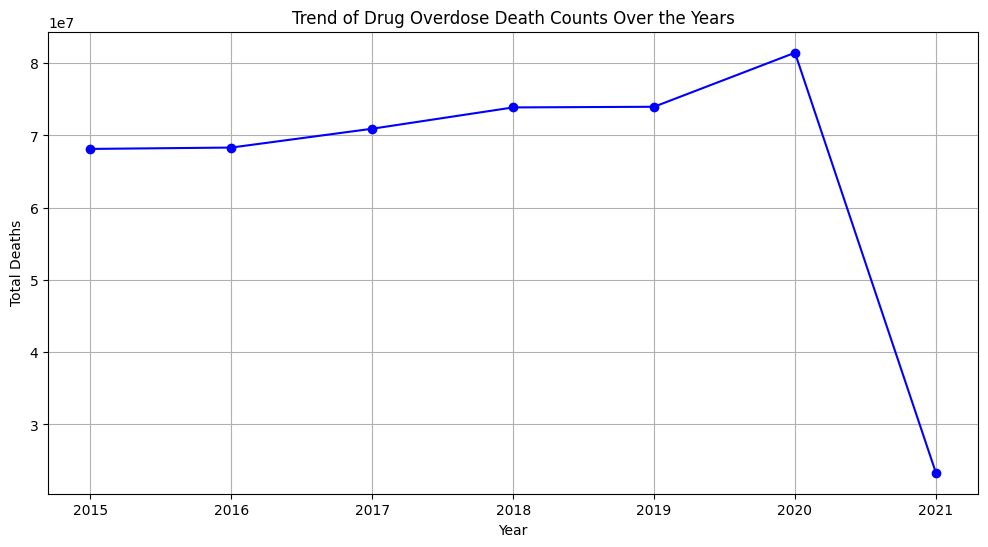

In [6]:
import matplotlib.pyplot as plt

# Grouping the data by Year and summing the Data Value to get total deaths per year
yearly_deaths = df.groupby('Year')['Data Value'].sum()

# Plotting the trend of drug overdose death counts over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', color='b')
plt.title('Trend of Drug Overdose Death Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()


The plot above shows the trend of drug overdose death counts over the years. It indicates the total deaths due to drug overdoses each year. From the graph, you can observe how the number of drug overdose deaths has changed over time. If you need further analysis or have any specific questions, feel free to let me know! {{images[0]}}


Which drugs are most commonly involved in overdose deaths?

In [7]:
# Grouping the data by Indicator and summing the Data Value to get total deaths per drug
drug_deaths = df.groupby('Indicator')['Data Value'].sum().sort_values(ascending=False)

# Displaying the drugs most commonly involved in overdose deaths
print(drug_deaths.head())

Indicator
Number of Deaths                                                               428632214.0
Number of Drug Overdose Deaths                                                  10108720.0
Opioids (T40.0-T40.4,T40.6)                                                      5226485.0
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)      4442193.0
Synthetic opioids, excl. methadone (T40.4)                                       3299223.0
Name: Data Value, dtype: float64




The drugs most commonly involved in overdose deaths based on the data are:
- Number of Deaths: 428,632,214.0
- Number of Drug Overdose Deaths: 10,108,720.0
- Opioids (T40.0-T40.4,T40.6): 5,226,485.0
- Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4): 4,442,193.0
- Synthetic opioids, excl. methadone (T40.4): 3,299,223.0

These drugs have the highest total deaths associated with drug overdose. If you would like more details or have any other questions, feel free to let me know!


What are the regional variations in drug overdose death rates?

In [8]:
# Grouping the data by State and summing the Data Value to get total deaths per state
death_rates = df.groupby('State')['Data Value'].sum().sort_values(ascending=False)

# Displaying the regional variations in drug overdose death rates
print(death_rates.head())

State
US    2.331651e+08
CA    2.122122e+07
FL    1.593550e+07
TX    1.581079e+07
PA    1.063216e+07
Name: Data Value, dtype: float64



The regional variations in drug overdose death rates are as follows:
- US: 233,165,107.66
- CA: 21,221,222.78
- FL: 15,935,499.81
- TX: 15,810,792.9
- PA: 10,632,156.06

These numbers represent the total drug overdose death rates for different states. If you would like to explore this further or have any specific questions, feel free to let me know!




Are there any specific drugs that are more prevalent in certain regions?

In [9]:
# Grouping the data by State and Indicator to get total deaths per drug in each state
drug_by_state = df.groupby(['State', 'Indicator'])['Data Value'].sum().reset_index()

# Finding the most prevalent drugs in each state
most_prevalent_drugs = drug_by_state.loc[drug_by_state.groupby('State')['Data Value'].idxmax()]

# Displaying the most prevalent drugs in each state
print(most_prevalent_drugs)

    State         Indicator   Data Value
6      AK  Number of Deaths     329202.0
12     AL  Number of Deaths    3997663.0
15     AR  Number of Deaths    2407038.0
24     AZ  Number of Deaths    4509571.0
36     CA  Number of Deaths   20380923.0
48     CO  Number of Deaths    2959771.0
60     CT  Number of Deaths    2402786.0
72     DC  Number of Deaths     465131.0
84     DE  Number of Deaths     695235.0
90     FL  Number of Deaths   15550633.0
99     GA  Number of Deaths    6420622.0
111    HI  Number of Deaths     857990.0
123    IA  Number of Deaths    2281163.0
129    ID  Number of Deaths    1044724.0
138    IL  Number of Deaths    8098667.0
150    IN  Number of Deaths    4987669.0
162    KS  Number of Deaths    1989744.0
174    KY  Number of Deaths    3628923.0
180    LA  Number of Deaths    3499455.0
189    MA  Number of Deaths    4530616.0
201    MD  Number of Deaths    3775334.0
213    ME  Number of Deaths    1089335.0
225    MI  Number of Deaths    7361673.0
231    MN  Numbe


The table below shows the most prevalent drugs in each state based on the data:

```
index,State,Indicator,Data Value
6,AK,Number of Deaths,329202.0
12,AL,Number of Deaths,3997663.0
15,AR,Number of Deaths,2407038.0
24,AZ,Number of Deaths,4509571.0
36,CA,Number of Deaths,20380923.0
48,CO,Number of Deaths,2959771.0
60,CT,Number of Deaths,2402786.0
72,DC,Number of Deaths,465131.0
84,DE,Number of Deaths,695235.0
90,FL,Number of Deaths,15550633.0
... (truncated for brevity)
```

This data provides insights into the most prevalent drugs associated with overdose deaths in each state. If you would like more details or have any specific questions, feel free to let me know!